In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data_frame = pd.read_csv("loan_data (2).csv")

In [3]:
data_frame.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
#Feature Transformation

In [5]:
# One-hot encode 'purpose'
data_frame = pd.get_dummies(data_frame, columns=['purpose'], drop_first=True)

In [6]:
data_frame.head()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


<AxesSubplot: title={'center': 'Loan Status Distribution'}>

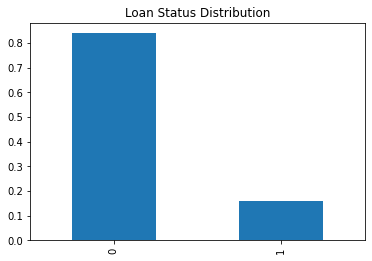

In [7]:
data_frame['not.fully.paid'].value_counts(normalize=True).plot(kind='bar', title='Loan Status Distribution')


In [8]:
#Exploratory Data Analysis (EDA)

<AxesSubplot: >

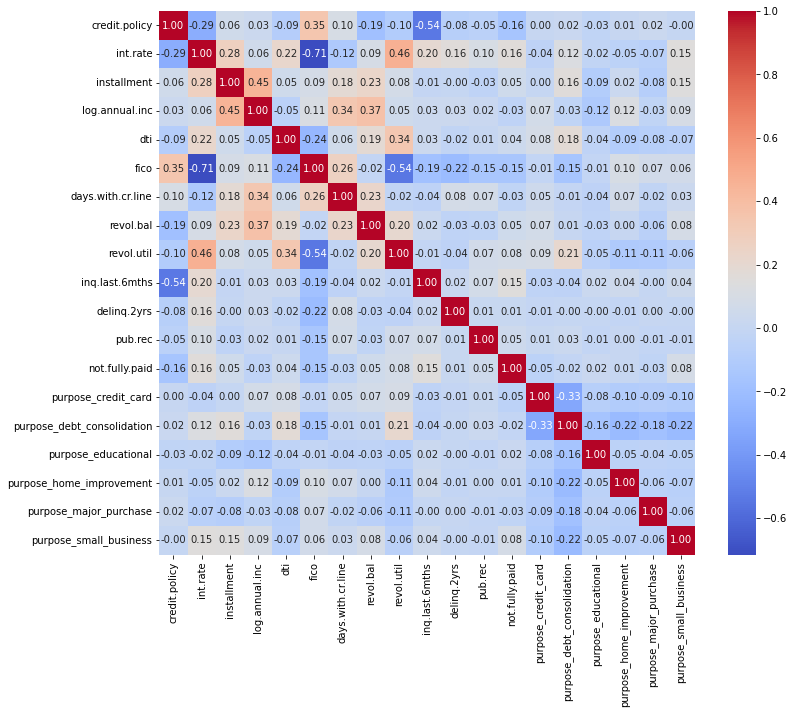

In [9]:
 #Visual Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(data_frame.corr(), annot=True, fmt=".2f", cmap="coolwarm")


<AxesSubplot: xlabel='not.fully.paid', ylabel='int.rate'>

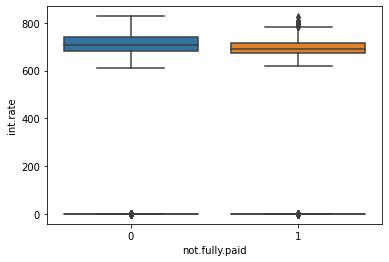

In [10]:
# Boxplots or Histograms
sns.boxplot(x='not.fully.paid', y='fico', data=data_frame)
sns.boxplot(x='not.fully.paid', y='int.rate', data=data_frame)

In [11]:
#Additional Feature Engineering 
# Correlation Analysis -- Drop features with high correlation (> 0.9) to avoid multicollinearity:

In [12]:
corr_matrix = data_frame.corr().abs()

In [13]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

In [14]:
# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [15]:
# Drop them
data_frame.drop(columns=to_drop, inplace=True)

<AxesSubplot: >

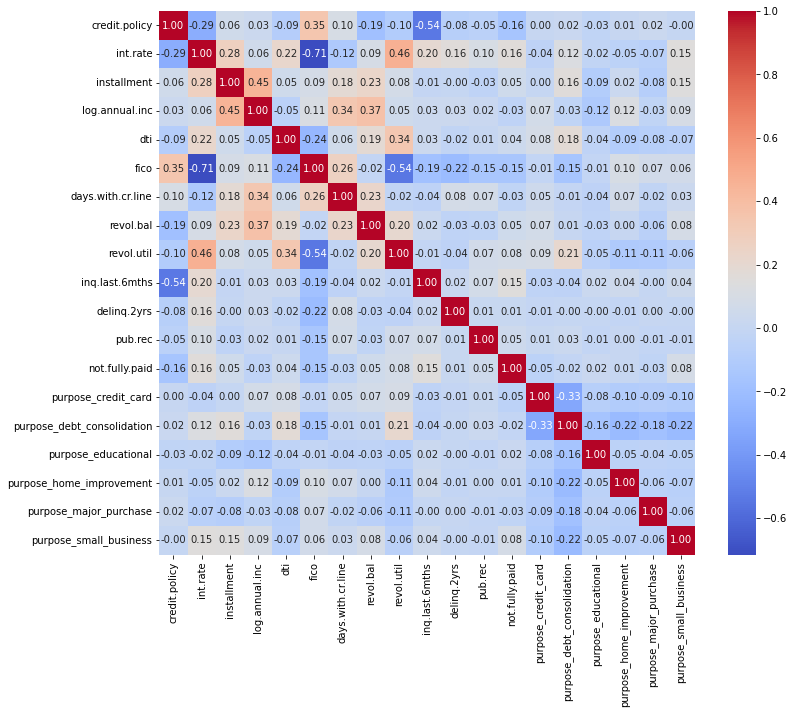

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_frame.corr(), annot=True, fmt=".2f", cmap="coolwarm")


In [21]:
# Standardize the features
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


num_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 
            'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']


# Define features and target
X = data_frame[num_cols]
y = data_frame['not.fully.paid']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels=  train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Standardize the features

train_features = scaler.fit_transform(train_data)
test_features = scaler.transform(test_data)

# Print the standardized training features
print(train_features)

[[ 0.8687074   0.04912236 -1.53503058 ... -0.26675113 -0.29883115
  -0.23913127]
 [-1.43196309 -0.39175655  0.47545065 ... -0.71447231 -0.29883115
  -0.23913127]
 [-0.28348024 -0.86550291  0.38593742 ... -0.26675113 -0.29883115
  -0.23913127]
 ...
 [ 0.74644955  1.95151386  0.13800664 ... -0.71447231 -0.29883115
  -0.23913127]
 [-0.21679414 -0.33579959  0.11101086 ... -0.26675113 -0.29883115
  -0.23913127]
 [ 0.59455343  0.04902554  0.77321965 ... -0.26675113 -0.29883115
  -0.23913127]]


In [22]:
# Function to build the neural network model
def build_model():
    model = Sequential([
        Dense(20, activation='relu', input_shape=[train_features.shape[1]]),
        Dense(1, activation='sigmoid')  # Sigmoid for binary output
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])  # Use accuracy for classification
    return model

In [23]:
# Custom callback class to print a dot for every epoch
from tensorflow.keras.callbacks import EarlyStopping, Callback

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 100 == 0: print('')
        print('.', end='')

# Build model
model = build_model()

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train model
history = model.fit(train_features, train_labels, epochs=200, batch_size=32, validation_split=0.1,
                    callbacks=[early_stop, PrintDot()])

# Save history
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Final accuracy
final_acc = float(hist['val_accuracy'].iloc[-1])

print()
print('Final Accuracy on validation set: {:.3f}'.format(final_acc))

Epoch 1/200


/voc/work/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-22 17:06:26.861428: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


207/216 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.7082 - loss: 0.5987
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7122 - loss: 0.5955 - val_accuracy: 0.8449 - val_loss: 0.4338
Epoch 2/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8465 - loss: 0.4294 - val_accuracy: 0.8449 - val_loss: 0.4140
Epoch 3/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.8409 - loss: 0.4221 - val_accuracy: 0.8449 - val_loss: 0.4072
Epoch 4/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.8336 - loss: 0.4312 - val_accuracy: 0.8462 - val_loss: 0.4046
Epoch 5/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.8438 - loss: 0.4120 - val_accuracy: 0.8462 - val_loss: 0.4033
Epoch 6/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8384 - loss: 0.4187 - val_accuracy: 0.8462 - val_loss: 0.4011
Epoch 7/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.8313 - loss: 0.4327 - val_accuracy: 0.8462 - val_loss: 0.3998
Epoch 8/200
216/216 

In [25]:
# Evaluate the model's performance on the test set
mae, _ =  model.evaluate(test_features, test_labels)
print('Mean Absolute Error on test set: {}'.format(round(mae, 3)))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.8490 - loss: 0.3961
Mean Absolute Error on test set: 0.41


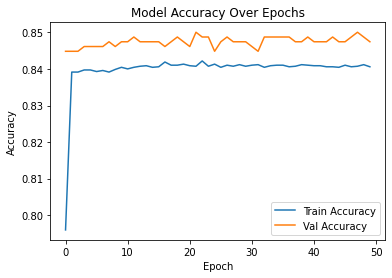

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()